In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [2]:
data=pd.read_csv('project-diabetes.csv')
data.sample(12)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
539,3,129,92,49,155,36.4,0.968,32,1
326,1,122,64,32,156,35.1,0.692,30,1
386,5,116,74,29,0,32.3,0.660,35,1
240,1,91,64,24,0,29.2,0.192,21,0
489,8,194,80,0,0,26.1,0.551,67,0
697,0,99,0,0,0,25.0,0.253,22,0
227,3,162,52,38,0,37.2,0.652,24,1
698,4,127,88,11,155,34.5,0.598,28,0
357,13,129,0,30,0,39.9,0.569,44,1
754,8,154,78,32,0,32.4,0.443,45,1


In [3]:
data.shape

(768, 9)

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.isnull().values.any()

False

In [6]:
diabetic = len(data.loc[data["Outcome"]==1])

nondiabetic = len(data.loc[data["Outcome"]==0])
print(diabetic,nondiabetic)

268 500


<AxesSubplot:xlabel='Outcome', ylabel='count'>

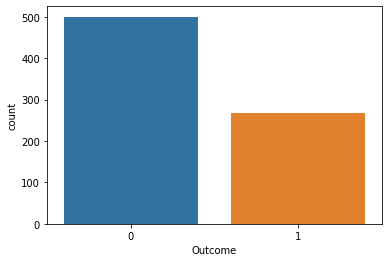

In [7]:
sns.countplot(x="Outcome",data=data)

In [8]:
x=data[['Pregnancies','Glucose','BloodPressure', 'SkinThickness','Insulin','BMI','Age','DiabetesPedigreeFunction']]
y=data[['Outcome']]

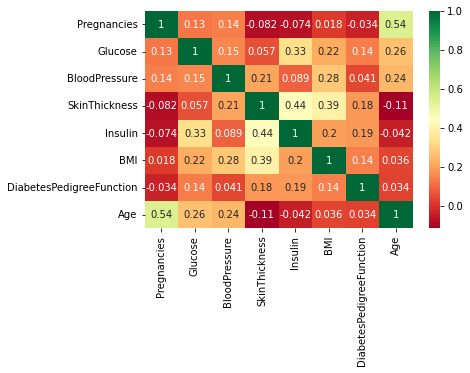

In [9]:
sns.heatmap(data[data.columns[:8]].corr(),annot=True,cmap='RdYlGn')
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
q =  pd.DataFrame(std.fit_transform(data.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
      'BMI', 'DiabetesPedigreeFunction', 'Age'])
q.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [11]:
print("Total number of rows :", len(data))
print("No. of rows missing Pregnancies :",len(data.loc[data['Pregnancies']==0]))
print("No. of rows missing glucose concentration :",len(data.loc[data['Glucose']==0]))
print("No. of rows missing BloodPressure values :",len(data.loc[data['BloodPressure']==0]))
print("No. of rows missing SkinThickness values :",len(data.loc[data['SkinThickness']==0]))
print("No. of rows missing Insulin :",len(data.loc[data['Insulin']==0]))
print("No. of rows missing BMI :",len(data.loc[data['BMI']==0]))
print("No. of rows missing Age :",len(data.loc[data['Age']==0]))
print("No. of rows missing DiabetesPedigreeFunction :",len(data.loc[data['DiabetesPedigreeFunction']==0]))

Total number of rows : 768
No. of rows missing Pregnancies : 111
No. of rows missing glucose concentration : 5
No. of rows missing BloodPressure values : 35
No. of rows missing SkinThickness values : 227
No. of rows missing Insulin : 374
No. of rows missing BMI : 11
No. of rows missing Age : 0
No. of rows missing DiabetesPedigreeFunction : 0


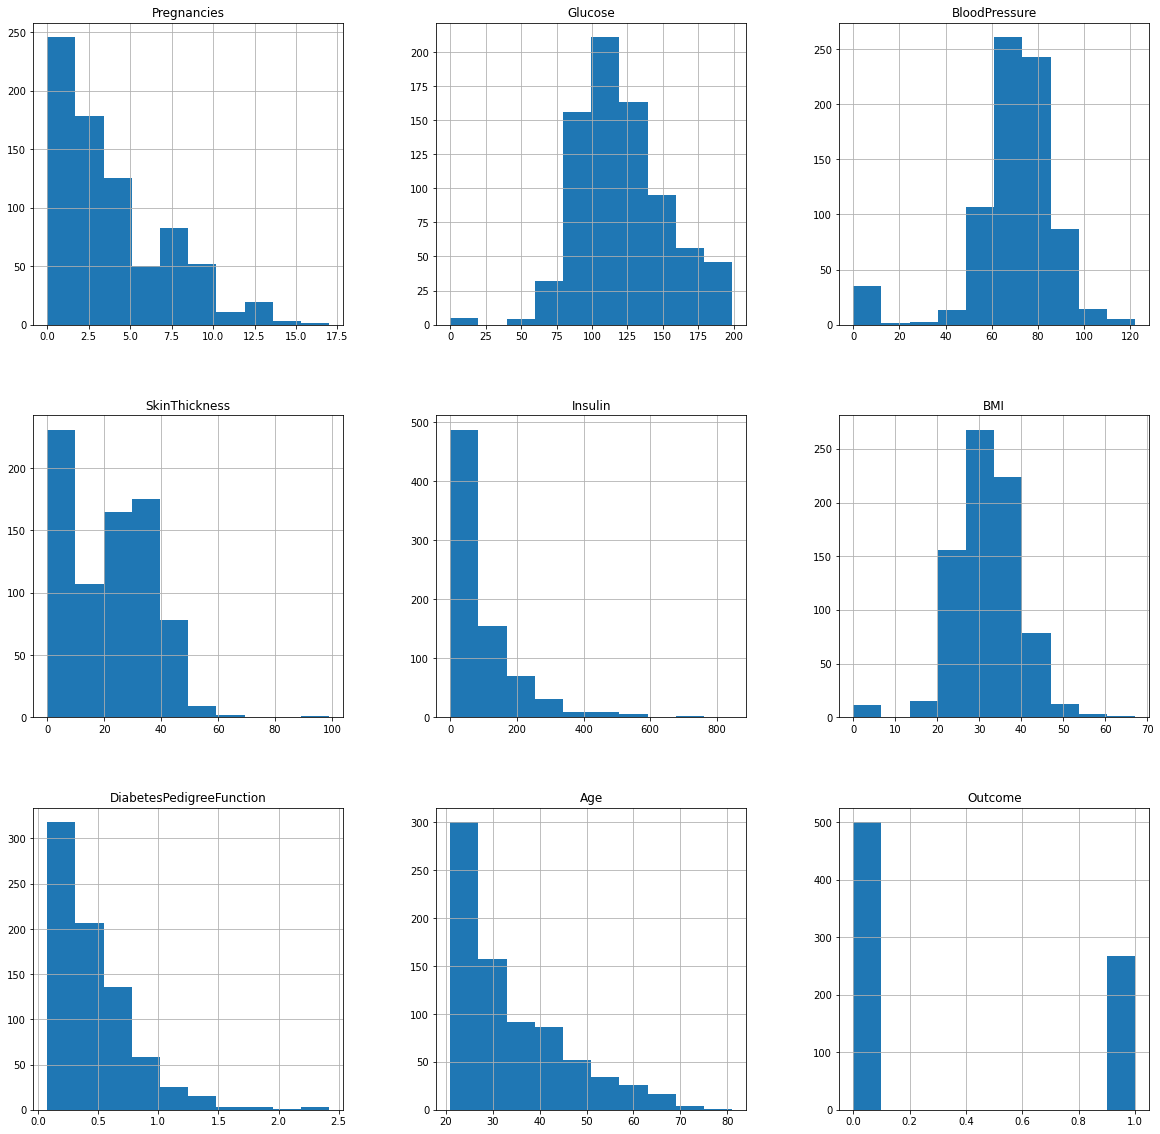

In [12]:
p = data.hist(figsize = (20,20))

In [13]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=0, strategy='mean')
data=imputer.fit_transform(data)
data1 = pd.DataFrame(data = data, columns=['Pregnancies','Glucose','BloodPressure', 'SkinThickness','Insulin','BMI','Age','DiabetesPedigree','Outcome'])
data1.sample(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,DiabetesPedigree,Outcome
497,2.000000,81.0,72.000000,15.00000,76.000000,30.100000,0.547,25.0,1.0
702,1.000000,168.0,88.000000,29.00000,155.548223,35.000000,0.905,52.0,1.0
337,5.000000,115.0,76.000000,29.15342,155.548223,31.200000,0.343,44.0,1.0
203,2.000000,99.0,70.000000,16.00000,44.000000,20.400000,0.235,27.0,1.0
36,11.000000,138.0,76.000000,29.15342,155.548223,33.200000,0.420,35.0,1.0
750,4.000000,136.0,70.000000,29.15342,155.548223,31.200000,1.182,22.0,1.0
338,9.000000,152.0,78.000000,34.00000,171.000000,34.200000,0.893,33.0,1.0
95,6.000000,144.0,72.000000,27.00000,228.000000,33.900000,0.255,40.0,1.0
143,10.000000,108.0,66.000000,29.15342,155.548223,32.400000,0.272,42.0,1.0
345,8.000000,126.0,88.000000,36.00000,108.000000,38.500000,0.349,49.0,1.0


In [14]:
print("Total number of rows :", len(data1))
print("No. of rows missing Pregnancies :",len(data1.loc[data1['Pregnancies']==0]))
print("No. of rows missing glucose concentration :",len(data1.loc[data1['Glucose']==0]))
print("No. of rows missing BloodPressure values :",len(data1.loc[data1['BloodPressure']==0]))
print("No. of rows missing SkinThickness values :",len(data1.loc[data1['SkinThickness']==0]))
print("No. of rows missing Insulin :",len(data1.loc[data1['Insulin']==0]))
print("No. of rows missing BMI :",len(data1.loc[data1['BMI']==0]))
print("No. of rows missing Age :",len(data1.loc[data1['Age']==0]))
print("No. of rows missing DiabetesPedigreeFunction :",len(data1.loc[data1['DiabetesPedigree']==0]))

Total number of rows : 768
No. of rows missing Pregnancies : 0
No. of rows missing glucose concentration : 0
No. of rows missing BloodPressure values : 0
No. of rows missing SkinThickness values : 0
No. of rows missing Insulin : 0
No. of rows missing BMI : 0
No. of rows missing Age : 0
No. of rows missing DiabetesPedigreeFunction : 0


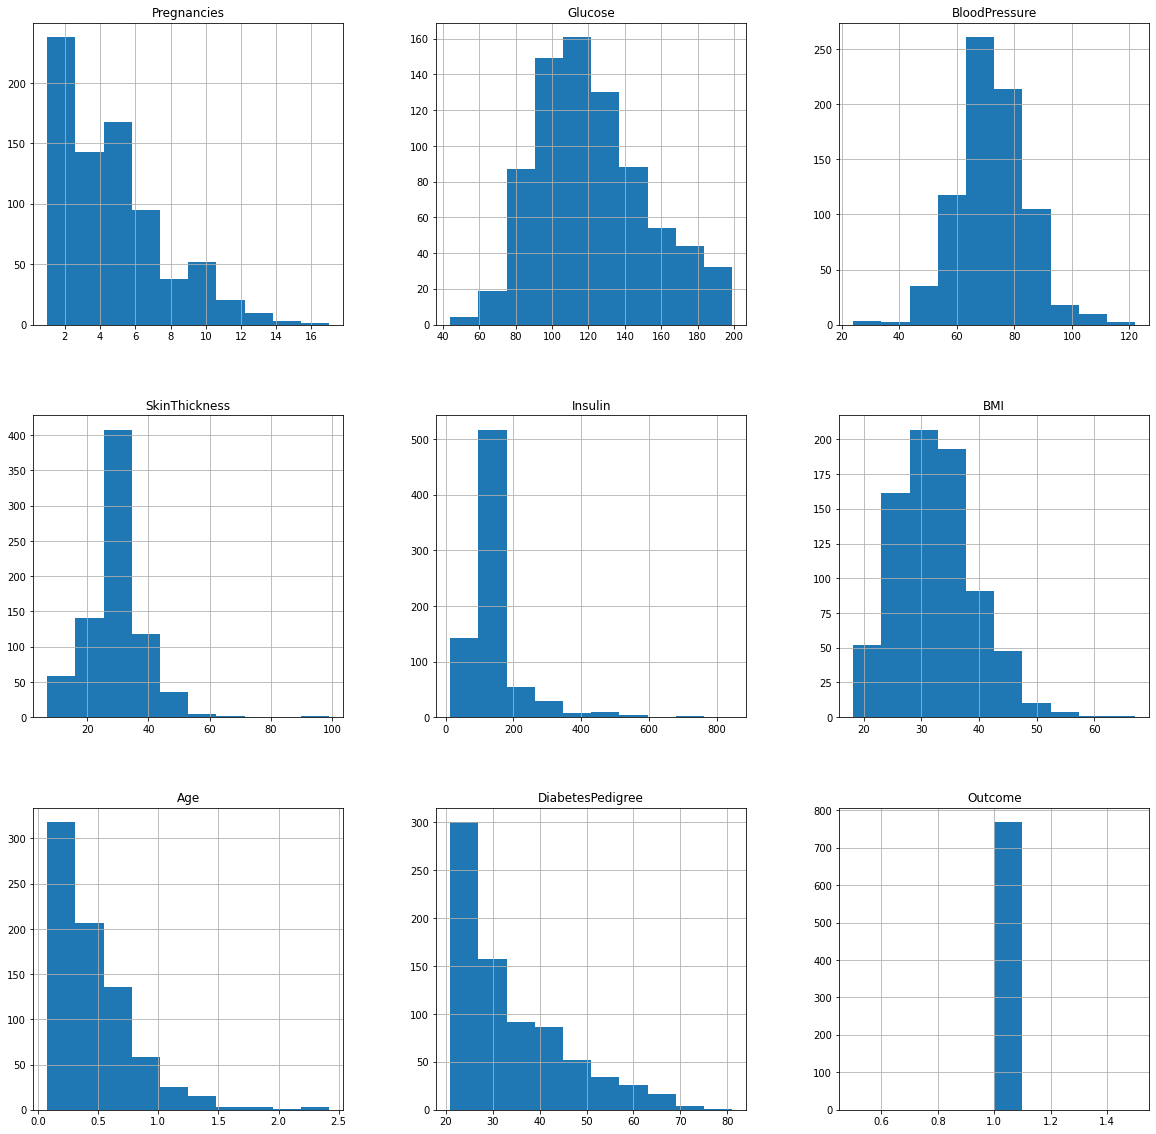

In [15]:
p = data1.hist(figsize = (20,20))

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = .20, random_state=10)

In [17]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_pred))
print('r2_score error: %.2f' % r2_score(y_test,y_pred))
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_pred,y_test))
print()
print("Classification Report")
print(classification_report(y_test, y_pred))

/home/thenielfarias/.local/share/virtualenvs/thenielfarias-orcZKmpx/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean absolute error: 0.23
r2_score error: 0.01
The accuracy of the Logistic Regression is 0.7662337662337663

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        95
           1       0.81      0.51      0.62        59

    accuracy                           0.77       154
   macro avg       0.78      0.72      0.73       154
weighted avg       0.77      0.77      0.75       154



/tmp/ipykernel_19309/1302824233.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()
/home/thenielfarias/.local/share/virtualenvs/thenielfarias-orcZKmpx/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/thenielfarias/.local/share/virtualenvs/thenielfarias-orcZKmpx/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/thenielfarias/.local/share/virtualenvs/thenielfarias-orcZKmpx/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataCo

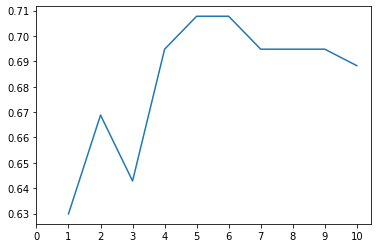

In [18]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(y_pred,y_test)))
plt.plot(a_index, a)
plt.xticks(x)
plt.show()

In [19]:
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_pred))
print('r2_score error: %.2f' % r2_score(y_test,y_pred))
print('Accuracies for different values of n are:',a.values)
print()
print("Classification Report")
print(classification_report(y_test, y_pred))

Mean absolute error: 0.31
r2_score error: -0.32
Accuracies for different values of n are: [0.62987013 0.66883117 0.64285714 0.69480519 0.70779221 0.70779221
 0.69480519 0.69480519 0.69480519 0.68831169]

Classification Report
              precision    recall  f1-score   support

           0       0.70      0.86      0.77        95
           1       0.65      0.41      0.50        59

    accuracy                           0.69       154
   macro avg       0.67      0.63      0.64       154
weighted avg       0.68      0.69      0.67       154



In [20]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_pred))
print('r2_score error: %.2f' % r2_score(y_test,y_pred))
print('The accuracy of the Decision Tree is',metrics.accuracy_score(y_pred,y_test))

Mean absolute error: 0.31
r2_score error: -0.32
The accuracy of the Decision Tree is 0.6883116883116883


In [21]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

/tmp/ipykernel_19309/952664851.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


In [22]:
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_pred))
print('r2_score error: %.2f' % r2_score(y_test,y_pred))
print("Accuracy by random forest:", accuracy_score(y_pred, y_test))
print()
print("Classification Report")
print(classification_report(y_test, y_pred))

Mean absolute error: 0.25
r2_score error: -0.07
Accuracy by random forest: 0.7467532467532467

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.89      0.81        95
           1       0.75      0.51      0.61        59

    accuracy                           0.75       154
   macro avg       0.75      0.70      0.71       154
weighted avg       0.75      0.75      0.73       154



In [23]:
dt={'model':['Logistic Regression','KNN CLASSIFIER','Decision Tree CLASSIFIER','RANDOMFOREST CLASSIFIER'],
    'Mean absolute error':[0.23,0.31,0.30,0.24],
    
    'r2_score error':[0.01,-0.32,-0.26,-0.02],
    
    'accuracy':[0.77,0.70,0.70,0.76],
   }   
Analysis = pd.DataFrame(dt,index = [1,2,3,4])
Analysis

,model,Mean absolute error,r2_score error,accuracy
1,Logistic Regression,0.23,0.01,0.77
2,KNN CLASSIFIER,0.31,-0.32,0.70
3,Decision Tree CLASSIFIER,0.30,-0.26,0.70
4,RANDOMFOREST CLASSIFIER,0.24,-0.02,0.76


/home/thenielfarias/.local/share/virtualenvs/thenielfarias-orcZKmpx/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'accuracies')

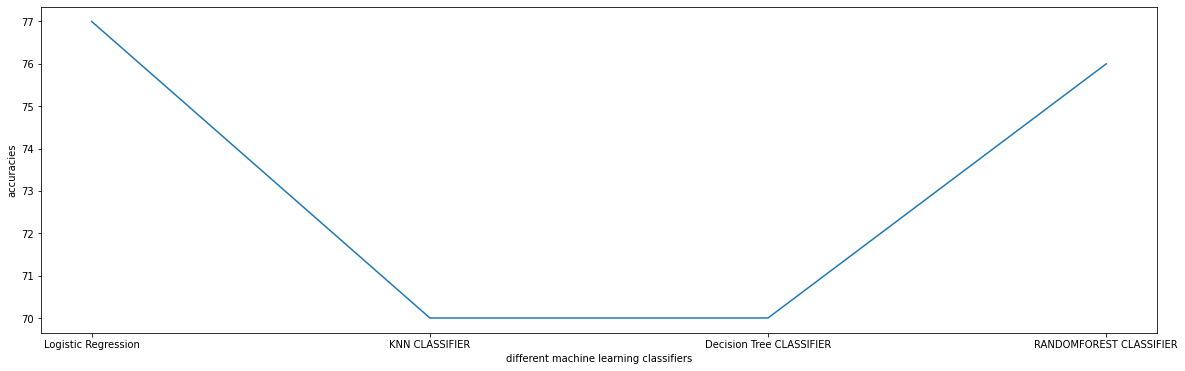

In [24]:
x=['Logistic Regression','KNN CLASSIFIER','Decision Tree CLASSIFIER','RANDOMFOREST CLASSIFIER']
y=[77,70,70,76]

fig_dims=(20,6)
fig,ax=plt.subplots(figsize=fig_dims)
sns.lineplot(x,y)
plt.xlabel('different machine learning classifiers')
plt.ylabel("accuracies") 